<a href="https://colab.research.google.com/github/mayankjaiswal29/Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

In [1]:
import pandas as pd
import numpy as np

In [2]:
sa = pd.read_csv('https://github.com/mayankjaiswal29/Datasets/raw/main/Twitter_Data.csv')

In [3]:
sa.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
sa.shape

(162980, 2)

In [5]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
sa.isna().sum()

clean_text    4
category      7
dtype: int64

In [7]:
sa = sa.dropna()

In [8]:
sa.duplicated().sum()

0

In [9]:
sa.drop_duplicates()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [10]:
CA = sa['category'].value_counts()

In [11]:
sa.shape

(162969, 2)

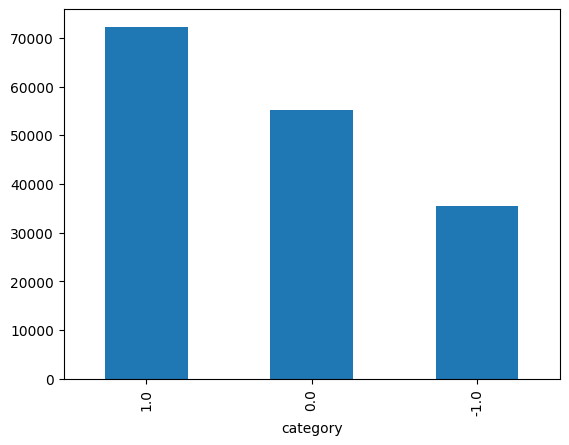

In [12]:
import matplotlib.pyplot as plt
CA.plot.bar()
plt.show()

In [13]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#sa['clean_text']= label_encoder.fit_transform(sa['clean_text'])

In [14]:
y = sa['category']

In [15]:
X = sa['clean_text']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify= y, random_state = 2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130375,), (32594,), (130375,), (32594,))

In [18]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  , classification_report

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.bar(y_test,y_pred)
fig.suptitle('relationship between the predicted and actual values', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)